<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/Data%20Visualization/TA/TSNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

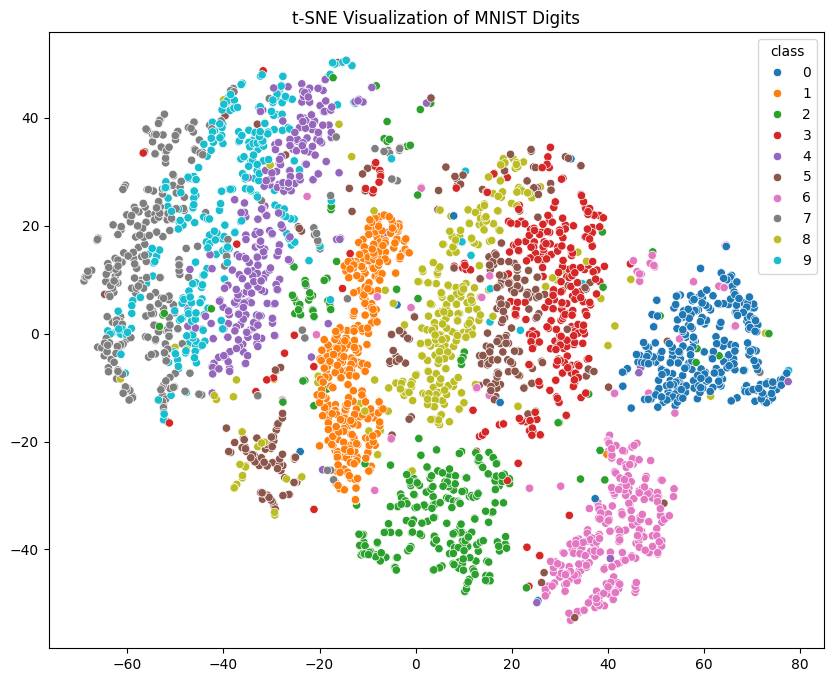

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the MNIST dataset (70,000 samples, 784 features)
mnist = fetch_openml('mnist_784', version=1)

# Extract the features (pixel values) and labels (digits)
X, y = mnist.data, mnist.target.astype(int)

# Split the data using train_test_split for a subset of 3000 samples
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=3000, random_state=42, stratify=y)

# Standardize the data (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Apply t-SNE to reduce dimensionality to 2 components (2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a scatter plot of the t-SNE result
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_subset, palette='tab10', legend='full')
plt.title('t-SNE Visualization of MNIST Digits')
plt.show()


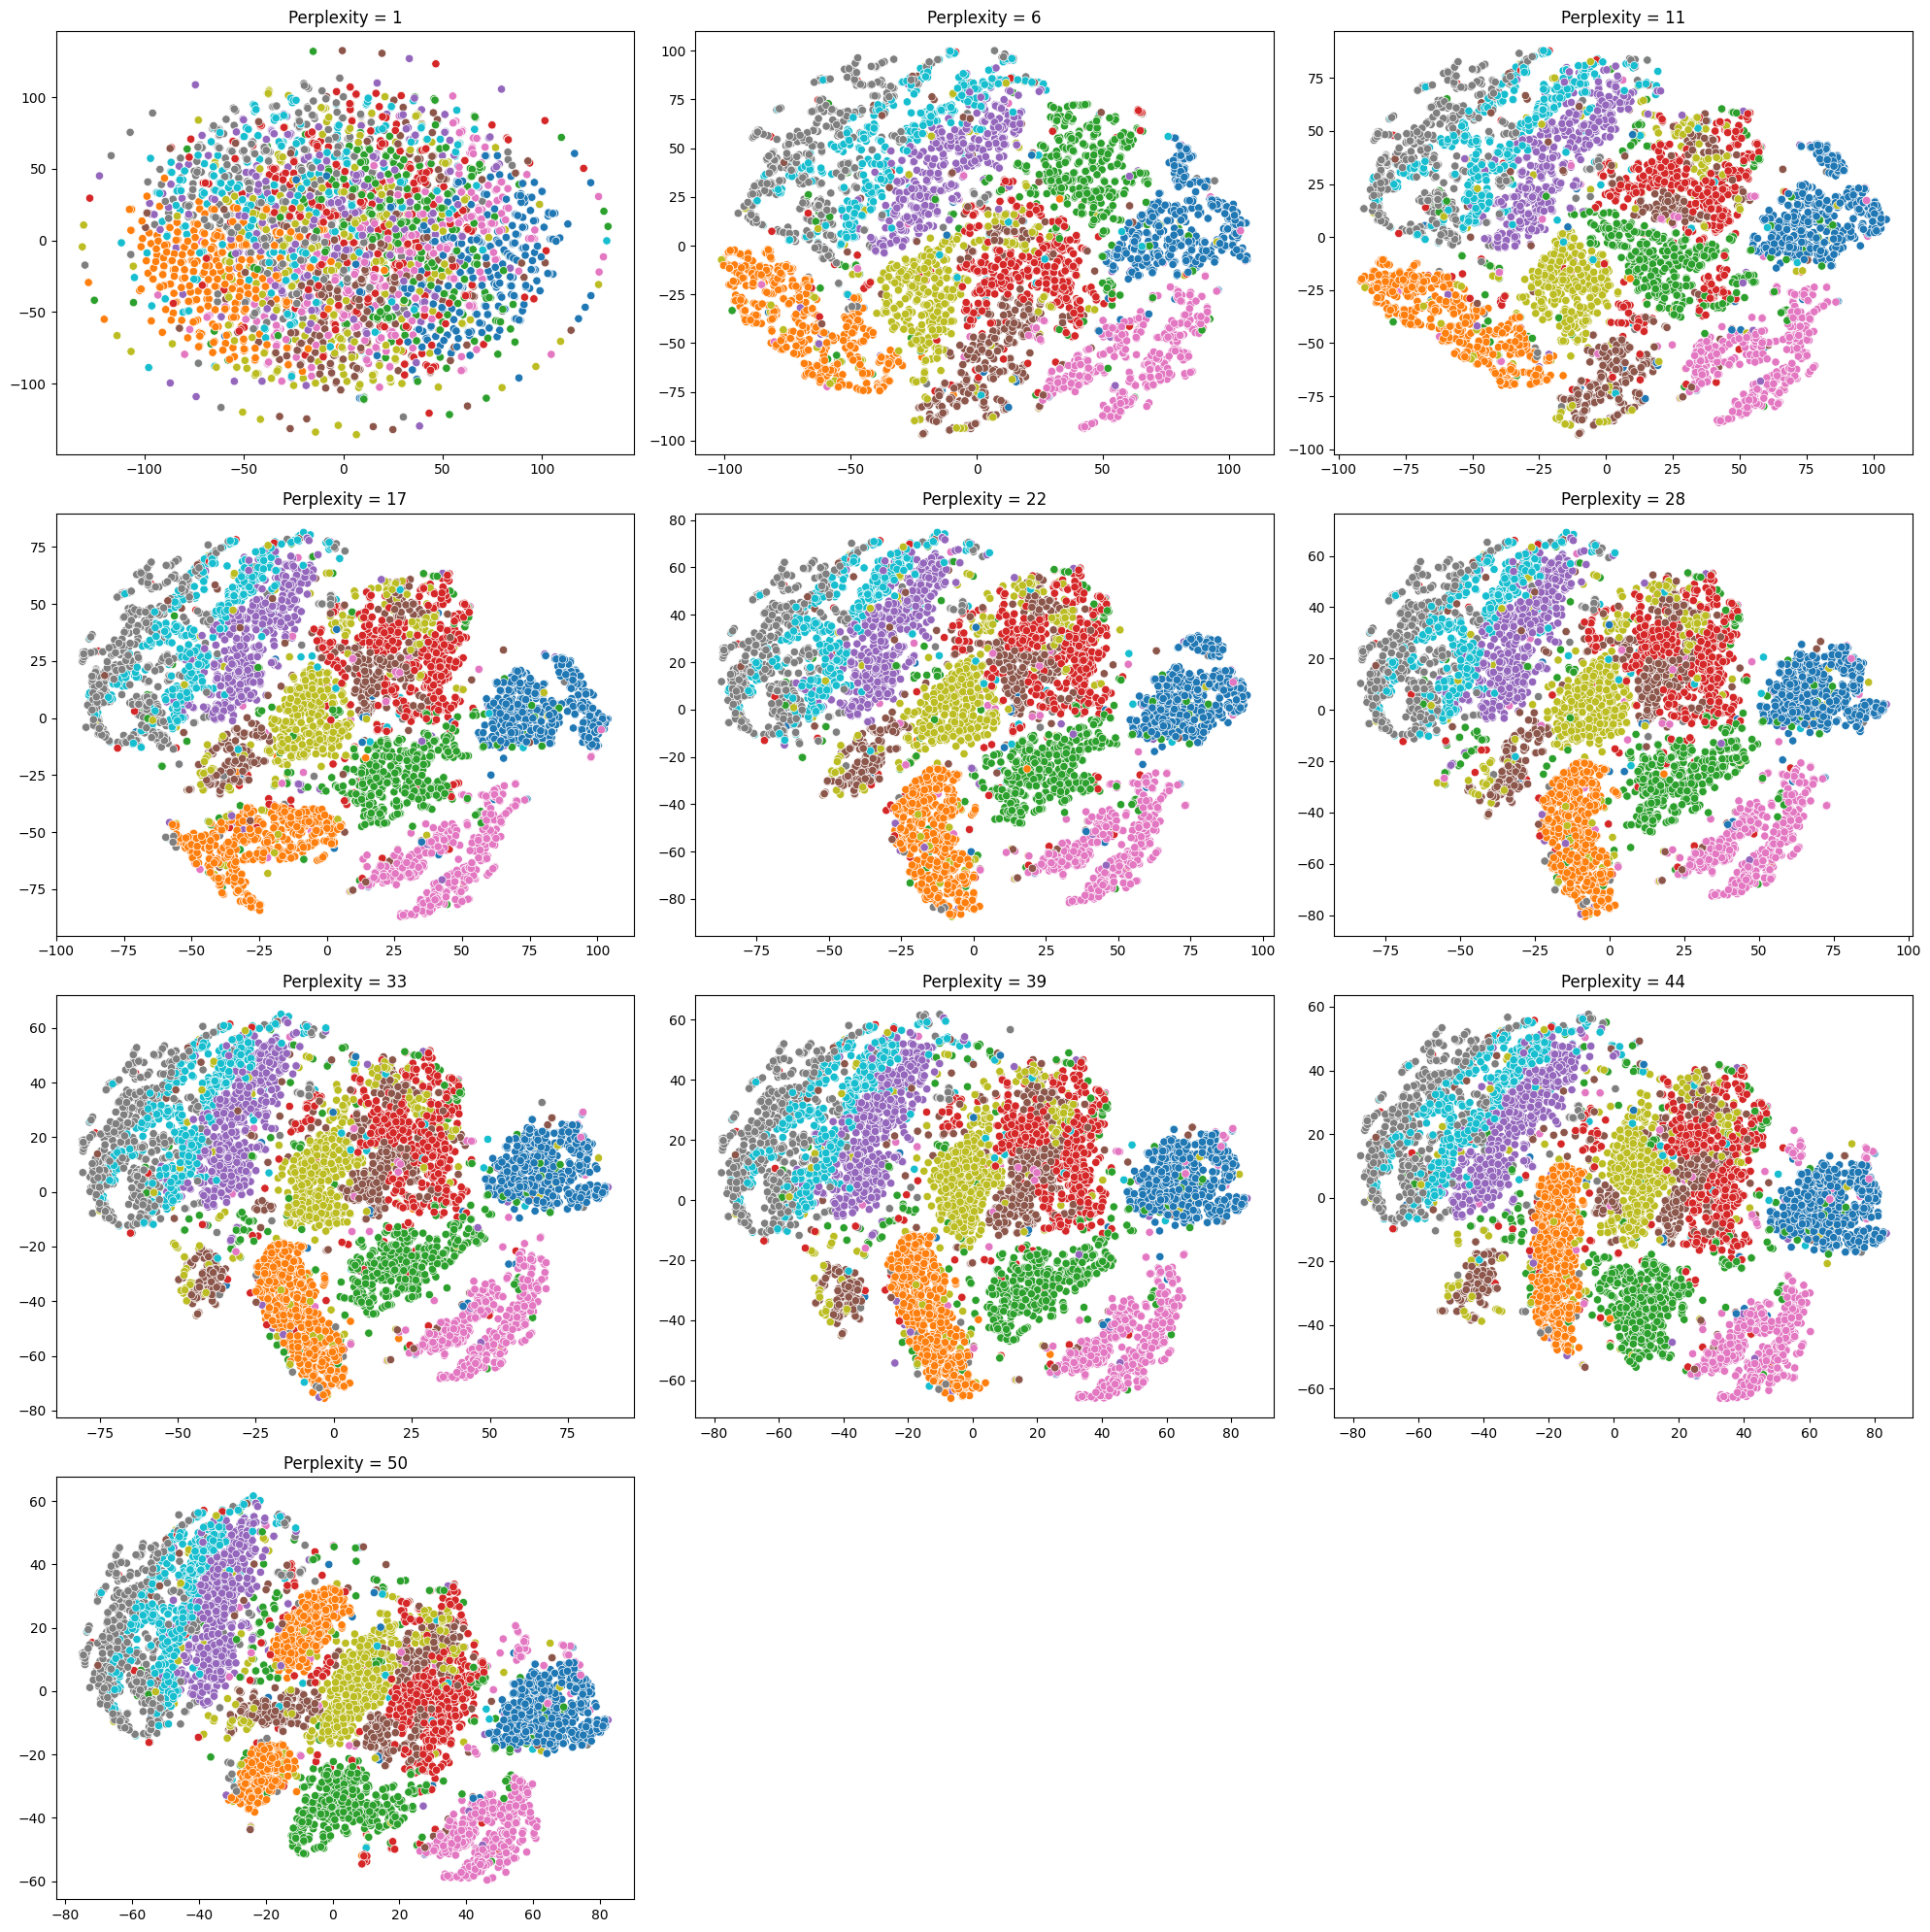

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the MNIST dataset (70,000 samples, 784 features)
mnist = fetch_openml('mnist_784', version=1)

# Extract the features (pixel values) and labels (digits)
X, y = mnist.data, mnist.target.astype(int)

# Split the data using train_test_split for a subset of 3000 samples
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=6000, random_state=42, stratify=y)

# Standardize the data (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Generate 10 perplexity values between 5 and 100
perplexities = np.linspace(1, 50, 10)

# Create a figure for subplots
plt.figure(figsize=(20, 20))

# Loop over different perplexity values
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Create subplot for each perplexity
    plt.subplot(4, 3, i + 1)  # 4x3 grid (12 slots, but we use 10)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_subset, palette='tab10', legend=None)
    plt.title(f'Perplexity = {int(perplexity)}')

# Display the plots
plt.tight_layout()
plt.show()


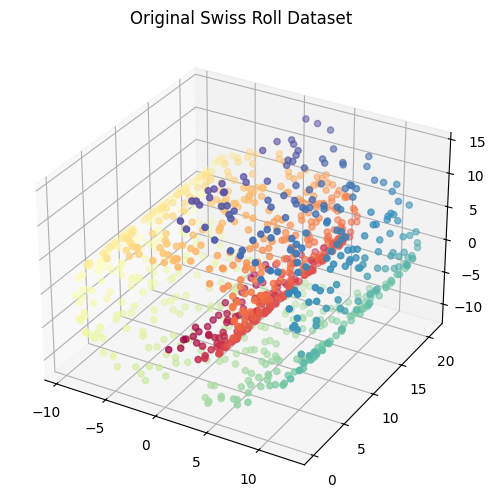

PCA Time: 0.0020 seconds
MDS Time: 43.9221 seconds
t-SNE Time: 5.4646 seconds
UMAP Time: 3.5271 seconds


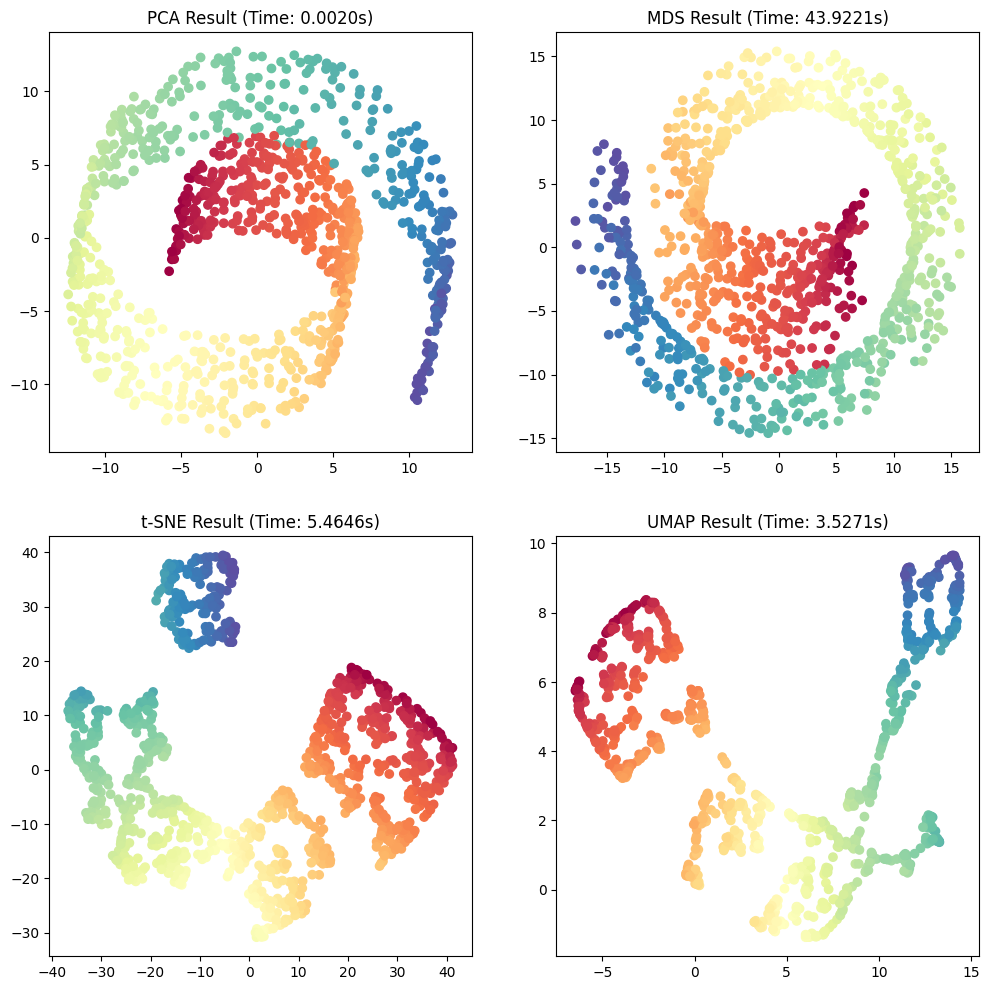

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import umap
from mpl_toolkits.mplot3d import Axes3D
import time

# Generate a 3D Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1000, noise=0.05)

# Plot the original 3D dataset
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll Dataset")
plt.show()

# Record the time for each dimensionality reduction method

# PCA
start_time = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_time = time.time() - start_time
print(f"PCA Time: {pca_time:.4f} seconds")

# MDS
start_time = time.time()
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)
mds_time = time.time() - start_time
print(f"MDS Time: {mds_time:.4f} seconds")

# t-SNE
start_time = time.time()
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
tsne_time = time.time() - start_time
print(f"t-SNE Time: {tsne_time:.4f} seconds")

# UMAP
start_time = time.time()
umap_reducer = umap.UMAP(n_components=2)
X_umap = umap_reducer.fit_transform(X)
umap_time = time.time() - start_time
print(f"UMAP Time: {umap_time:.4f} seconds")

# Plot the results of each dimensionality reduction method
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# PCA result
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
axs[0, 0].set_title(f'PCA Result (Time: {pca_time:.4f}s)')

# MDS result
axs[0, 1].scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.Spectral)
axs[0, 1].set_title(f'MDS Result (Time: {mds_time:.4f}s)')

# t-SNE result
axs[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
axs[1, 0].set_title(f't-SNE Result (Time: {tsne_time:.4f}s)')

# UMAP result
axs[1, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.Spectral)
axs[1, 1].set_title(f'UMAP Result (Time: {umap_time:.4f}s)')

plt.show()


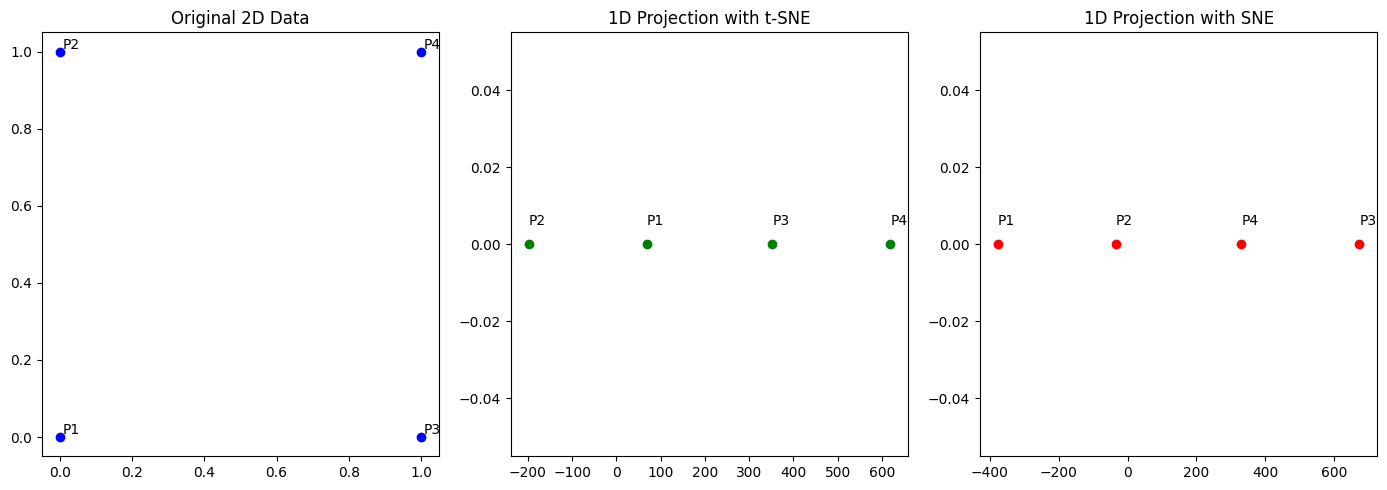

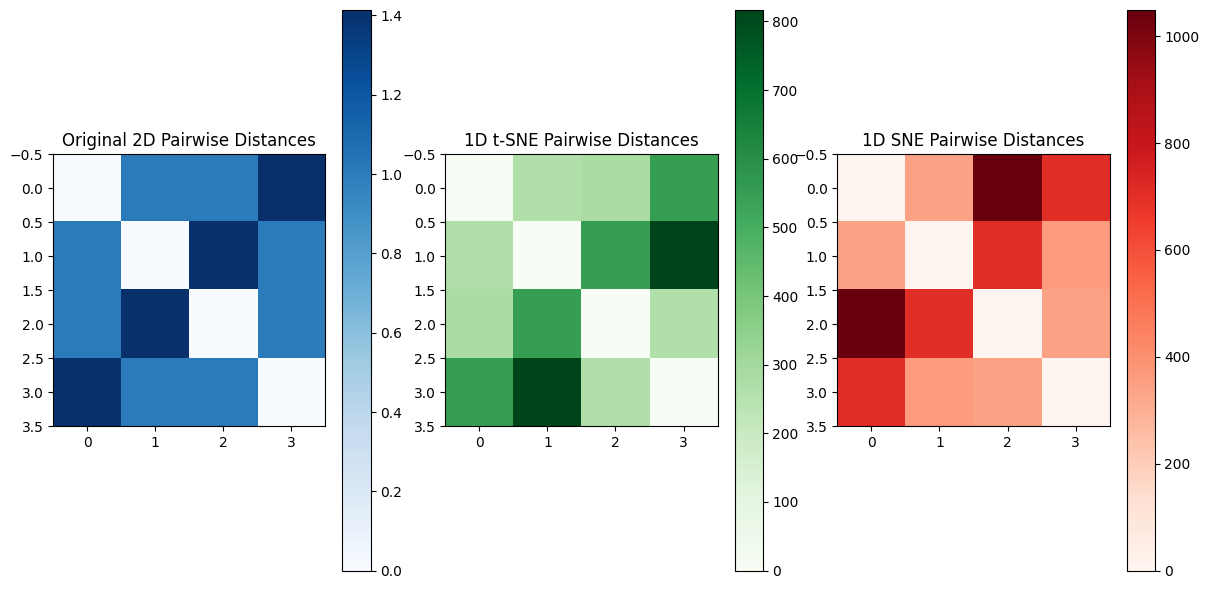

Average Distance Preservation Error (t-SNE): 340.7848447798779
Average Distance Preservation Error (SNE): 437.91924991598626


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform

# Original 2D data
data = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Compute pairwise distances in the original 2D space
original_distances = squareform(pdist(data, metric='euclidean'))

# Define t-SNE and SNE with 1D output
tsne = TSNE(n_components=1, perplexity=2, random_state=42, method='barnes_hut')
sne = TSNE(n_components=1, perplexity=2, random_state=42, method='exact')

# Fit and transform the data
data_tsne = tsne.fit_transform(data)
data_sne = sne.fit_transform(data)

# Compute pairwise distances in the 1D embeddings
tsne_distances = squareform(pdist(data_tsne, metric='euclidean'))
sne_distances = squareform(pdist(data_sne, metric='euclidean'))

# Plotting the results
plt.figure(figsize=(14, 5))

# Plot the original 2D data
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.title('Original 2D Data')
for i, point in enumerate(data):
    plt.annotate(f"P{i+1}", (point[0]+0.007, point[1]+0.007))

# Plot the 1D t-SNE result
plt.subplot(1, 3, 2)
plt.scatter(data_tsne, np.zeros_like(data_tsne), color='green')
plt.title('1D Projection with t-SNE')
for i, point in enumerate(data_tsne):
    plt.annotate(f"P{i+1}", (point[0], 0.005))

# Plot the 1D SNE result
plt.subplot(1, 3, 3)
plt.scatter(data_sne, np.zeros_like(data_sne), color='red')
plt.title('1D Projection with SNE')
for i, point in enumerate(data_sne):
    plt.annotate(f"P{i+1}", (point[0], 0.005))

plt.tight_layout()
plt.show()


# Calculate the distance preservation errors
tsne_error = np.abs(original_distances - tsne_distances)
sne_error = np.abs(original_distances - sne_distances)

# Plotting the results
plt.figure(figsize=(12, 6))

# Original pairwise distances
plt.subplot(1, 3, 1)
plt.imshow(original_distances, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Original 2D Pairwise Distances')

# t-SNE pairwise distances
plt.subplot(1, 3, 2)
plt.imshow(tsne_distances, cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.title('1D t-SNE Pairwise Distances')

# SNE pairwise distances
plt.subplot(1, 3, 3)
plt.imshow(sne_distances, cmap='Reds', interpolation='nearest')
plt.colorbar()
plt.title('1D SNE Pairwise Distances')

plt.tight_layout()
plt.show()

# Print average errors
print("Average Distance Preservation Error (t-SNE):", np.mean(tsne_error))
print("Average Distance Preservation Error (SNE):", np.mean(sne_error))




c:\Users\alireza\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
c:\Users\alireza\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\alireza\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more tha

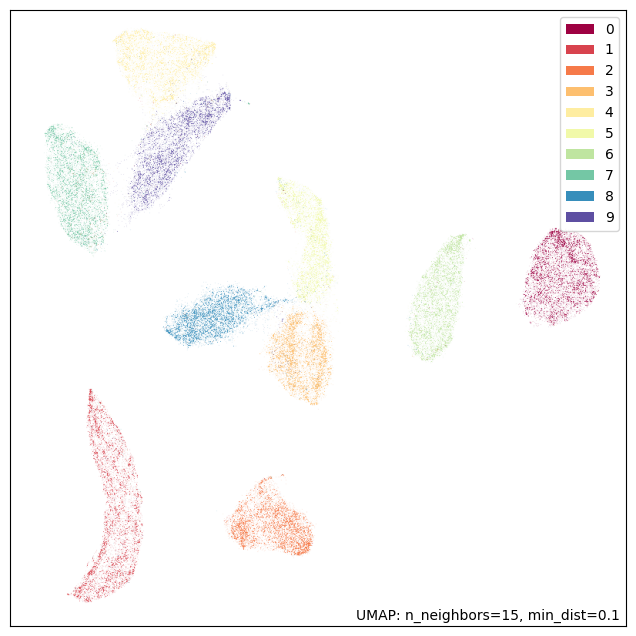

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import sklearn.datasets
import umap
import umap.plot
data, labels = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
mapper = umap.UMAP(random_state=42).fit(data)
umap.plot.points(mapper, labels=labels)

In [ ]:
corners = np.array([
    [-5, -5],  # 1
    [-2, 16],  # 7
    [7, -3],  # 2
    [20, 7],  # 0
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])

inv_transformed_points = mapper.inverse_transform(test_pts)

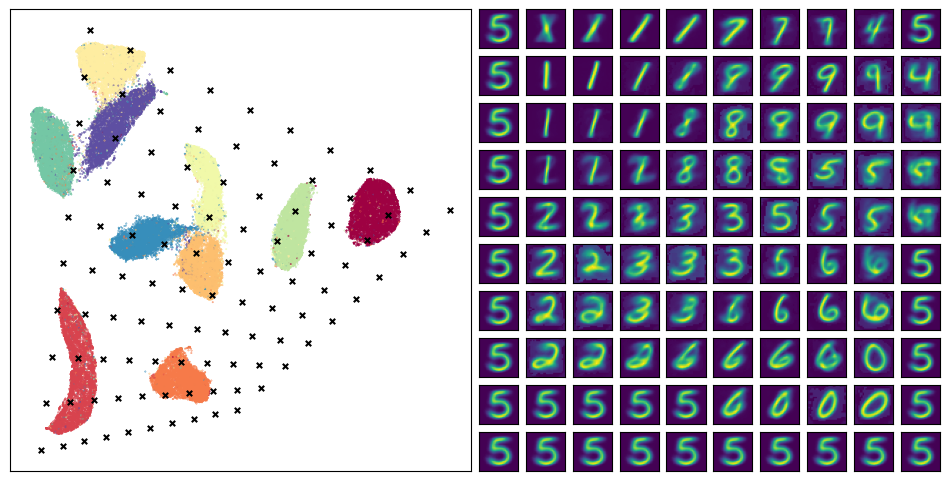

In [ ]:
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1],
                   c=labels.astype(np.int32), cmap='Spectral', s=0.1)
scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
for i in range(10):
    for j in range(10):
        digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28))
        digit_axes[i, j].set(xticks=[], yticks=[])

c:\Users\alireza\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


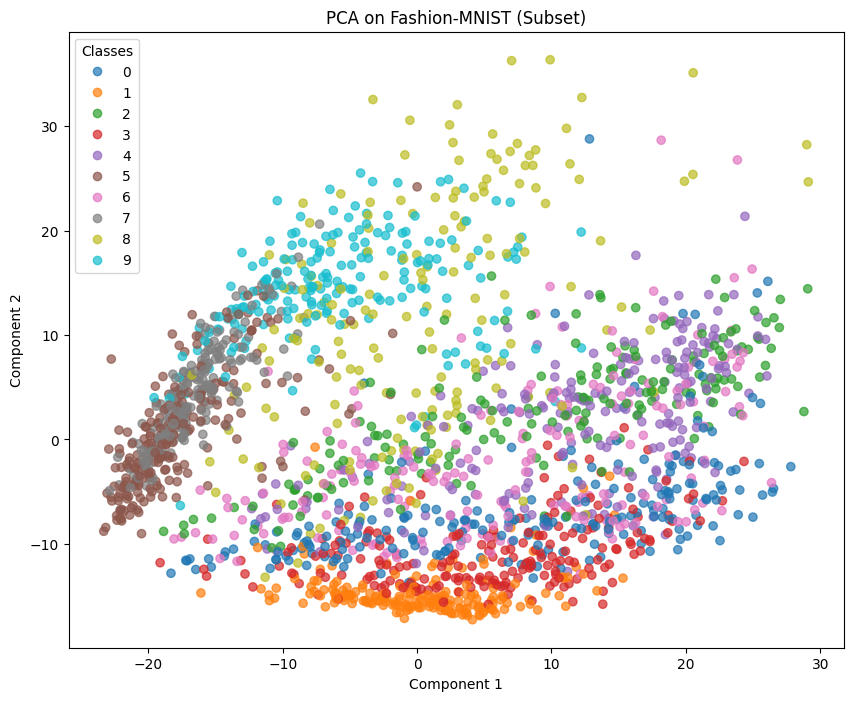

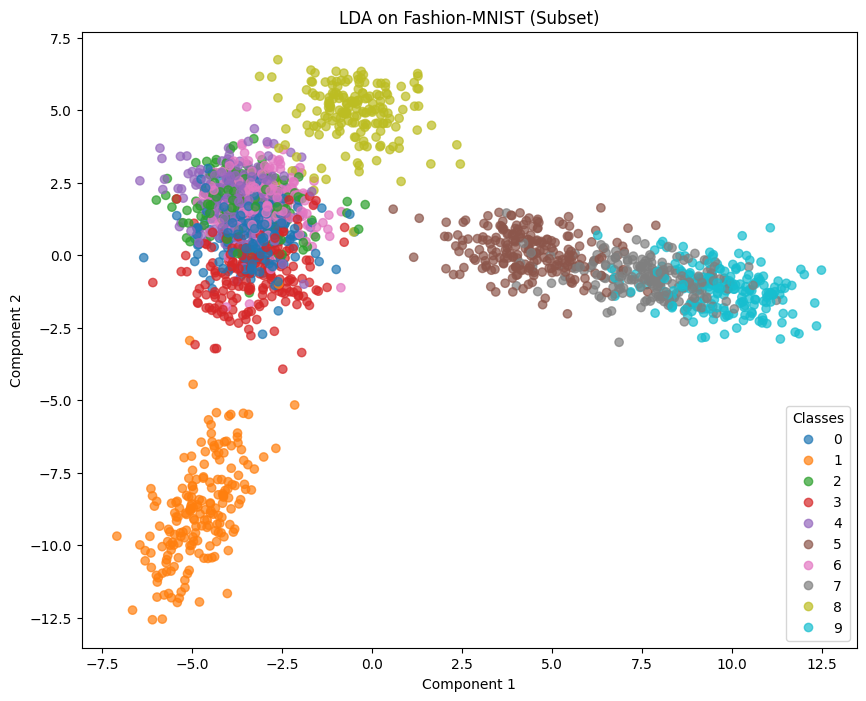

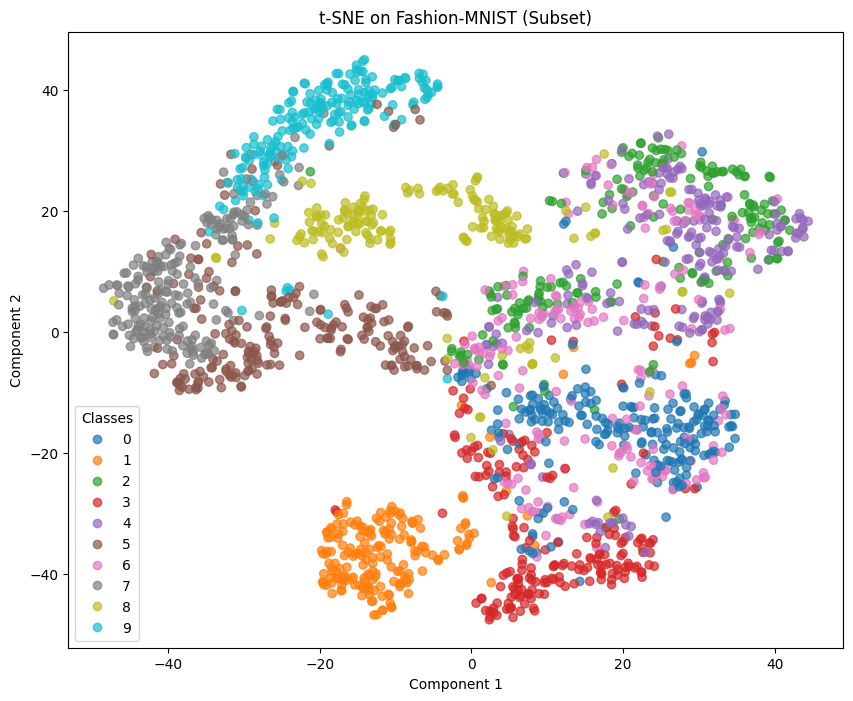

c:\Users\alireza\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


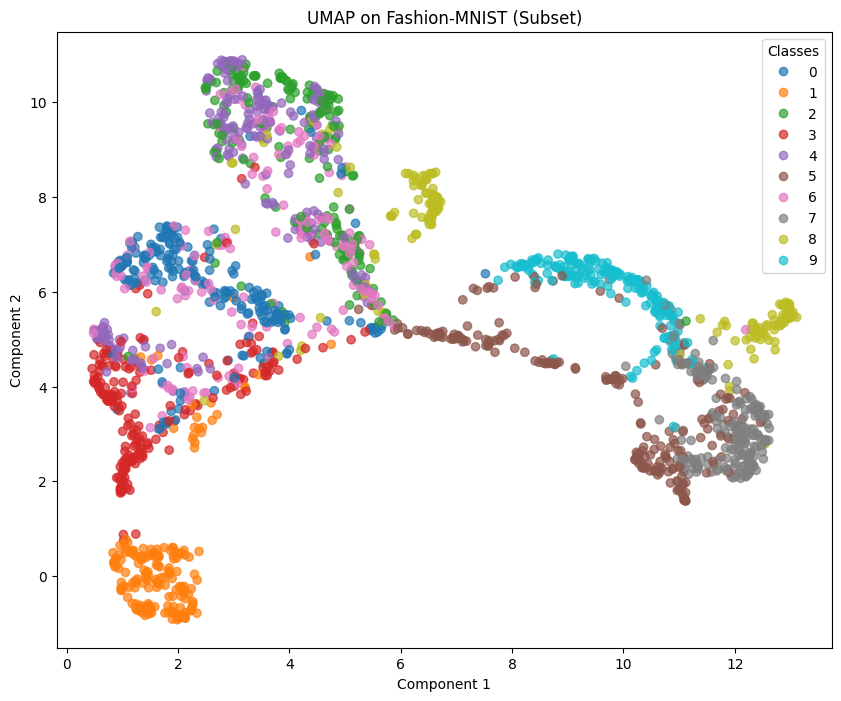

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from keras.datasets import fashion_mnist

# Load Fashion-MNIST data
(x_train, y_train), (_, _) = fashion_mnist.load_data()

# Flatten the images to 1D
x_train = x_train.reshape((x_train.shape[0], -1))
y_train = y_train.flatten()

# Select a subset of data
subset_size = 2000
indices = np.random.choice(x_train.shape[0], subset_size, replace=False)
x_train_subset = x_train[indices]
y_train_subset = y_train[indices]

# Standardize the subset data
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train_subset)

def plot_2d_projection(data_2d, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab10', alpha=0.7)

    # Extract unique labels and map them to the legend elements
    unique_labels = np.unique(labels)
    legend_elements = scatter.legend_elements()[0]

    # Create legend with unique labels
    plt.legend(legend_elements, unique_labels, title="Classes")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# 1. PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_std)
plot_2d_projection(x_pca, y_train_subset, "PCA on Fashion-MNIST (Subset)")

# 2. LDA
lda = LDA(n_components=2)
x_lda = lda.fit_transform(x_train_std, y_train_subset)
plot_2d_projection(x_lda, y_train_subset, "LDA on Fashion-MNIST (Subset)")

# 3. t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_train_std)
plot_2d_projection(x_tsne, y_train_subset, "t-SNE on Fashion-MNIST (Subset)")

# 4. UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
x_umap = umap_reducer.fit_transform(x_train_std)
plot_2d_projection(x_umap, y_train_subset, "UMAP on Fashion-MNIST (Subset)")
